# LAB 6. Support Vector Machine (SVM)

In this programming assignment, we'll learn how to implement and tune an SVMs with linear and non-linear kernels.

Input space               | Feature space
:------------------------:|:-------------------------:
![](01_logo1.png) | ![](02_logo2.png)

In the previous assignment, we learned Cross-Validation and Grid Search. They will be useful to you here.

We'll use the same [Titanic Kaggle Challenge](https://www.kaggle.com/c/titanic). Recall, description of the fields ([see in detail](https://www.kaggle.com/c/titanic/data)):
+ **survival** -- Survival: 0 = No, 1 = Yes
+ **pclass** -- Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
+ **sex** -- Sex
+ **Age** -- Age in years
+ **sibsp** -- # of siblings / spouses aboard the Titanic
+ **parch** -- # of parents / children aboard the Titanic
+ **ticket** -- Ticket number
+ **fare** -- Passenger fare
+ **cabin** -- Cabin number
+ **embarked** -- Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

In the end, we explore the comparison of different linear SVM classifiers on a 2D projection of the famous [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) and create a 3D plot for [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) decision boundaries.


## Outline
Click on these links to jump to a particular section of this assignment.
- [1. Loading and exploring data](#1)
    - [1.1. Load data](#1-1)
    - [1.2. Check the data](#1-2)
    - [1.3. Some more visualization](#1-3)
    - [1.4. Transform the data](#1-4)
- [2. Support Vector Machine Classifiers (SVCs)](#2)
    - [2.1. SVC and LinearSVC models](#2-1)
        - [2.1.1. Feature selection](#2-1-1)
        - [2.1.2. SVC with a linear kernel](#2-1-2)
        - [2.1.3. LinearSVC](#2-1-3)
        - [2.1.4. SVC with an RBF kernel](#2-1-4)
        - [2.1.5. SVC with a polynomial kernel](#2-1-5)
    - [2.2. Hyperparameter tuning](#2-2)
    - [2.3. Decision boundary visualization](#2-3)
        - [2.3.1. Plot 2D decision boundary](#2-3-1)
        - [2.3.2. Plot 3D decision boundary](#2-3-2)
    - [2.4. Create a submission file for the Titanic Kaggle Challenge](#2-4)
- [3. Exploring Iris Dataset](#3)
    - [3.1. Comparison of different SVM classifiers](#3-1)
    - [3.2. Plotting 3D decision boundary](#3-2)
- [4. Confusion matrix and its derivations](#4)
- [5. YOUR TURN](#5)


## Rreferences
- [Titanic: Machine Learning from Disaster (Kaggle Challenge)](https://www.kaggle.com/c/titanic)
- [Plot different SVM classifiers in the iris dataset](https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html)
- [Support-vector machine](https://en.wikipedia.org/wiki/Support-vector_machine)
- [Titanic Prediction with SVM](https://www.kaggle.com/l3r4nd/titanic-prediction-with-svm)
- [Support Vector Machines for classification](http://efavdb.com/svm-classification/)
- [Support Vector Machines Tutorial](https://statsbot.co/blog/support-vector-machines-tutorial/)
- [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
- [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)
- [sklearn.metrics.precision_recall_fscore_support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support)
- [the source of the left image](https://media.graphcms.com/GgUzgr1QQ0Cy1kNhr30u), [the source of the right image](https://media.graphcms.com/0FihJhuDRIiMMBzgs26H)

<a name="1"></a>
## 1. Loading and exploring data

<a name="1-1"></a>
### 1.1. Load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
# Load useful libraries
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.base import clone

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


# Load data
train = pd.read_csv('titanic_train_data.csv')
test = pd.read_csv('titanic_test_data.csv')

dataset = [train, test]

print("Shape of the train dataframe =", train.shape)
print("Shape of the test dataframe =", test.shape)
print()

train.head()

Shape of the train dataframe = (891, 12)
Shape of the test dataframe = (418, 11)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<a name="1-2"></a>
### 1.2. Check the data

In [ ]:
# Check missing values in train data
print(f"Missing values in the training set:\n{train.isnull().sum()}\n")
print(f"Missing values in the test set:\n{test.isnull().sum()}")

Missing values in the training set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in the test set:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<a name="1-3"></a>
### 1.3. Some more visualization

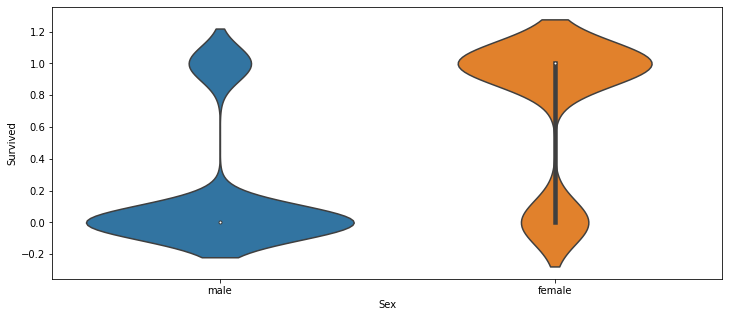

In [ ]:
# Here we can see that very few males survived as compared to female
fig, ax = plt.subplots(figsize=[12, 5])
sns.violinplot(x='Sex', y='Survived', data=train);

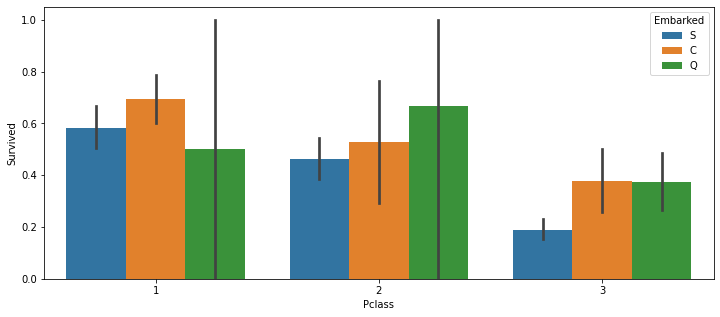

In [ ]:
# 1). 1st and 2nd classes had a better survival rate than the 3rd class.
# 2). The passengers of 2nd and 3rd classes who boarded at Southampton had the least survival rate.
fig, ax = plt.subplots(figsize=[12, 5])
sns.barplot(x='Pclass', y='Survived', data=train, hue='Embarked');

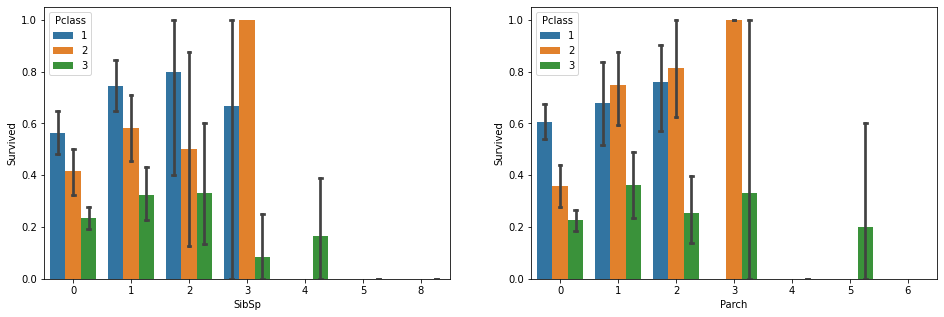

In [ ]:
# As you can see, 1st and 2nd class passengers with 1-3 family members had a better chance to survive.
fig, ax = plt.subplots(1, 2, figsize=[16, 5])
sns.barplot(x='SibSp', y='Survived', data=train, hue="Pclass", capsize=0.05, ax=ax[0])
sns.barplot(x='Parch', y='Survived', data=train, hue="Pclass", capsize=0.05, ax=ax[1]);

<a name="1-4"></a>
### 1.4. Transform the data

In [ ]:
for data in dataset:
    # Fill missing values of Age and Fare with median values
    data['Age'] = data['Age'].fillna(value=data['Age'].median())
    data['Fare'] = data['Fare'].fillna(value=data['Fare'].median())
    data["Embarked"] = data["Embarked"].fillna(value="S")   # because "S" is the most common port of embarkation    
    
    # Replace string values by numbers
    data["Sex"] = data["Sex"].map({"male": 1, "female": 0}).astype(int)    
    data["Embarked"] = data["Embarked"].map({"S": 1, "C": 2, "Q": 3}).astype(int)    
    
    # Create a new feature
    data["FamilySize"] = data["Parch"] + data["SibSp"]       

    
# Check missing Age and Fare values
print("Check missing values:")
print("  Train: Age - {}, Fare - {}".format(train.Age.isnull().sum(), train.Fare.isnull().sum()))
print("  Test : Age - {}, Fare - {}".format(test.Age.isnull().sum(), test.Fare.isnull().sum()))

Check missing values:
  Train: Age - 0, Fare - 0
  Test : Age - 0, Fare - 0


<a name="2"></a>
## 2. Support Vector Machine Classifiers (SVCs)

<a name="2-1"></a>
### 2.1. SVC and LinearSVC models

Please review [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and [sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) from the `sklearn`.


`LinearSVC` is similar to `SVC` with parameter `kernel='linear'`, but implemented in terms of `liblinear` rather than `libsvm`, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

In [ ]:
def SVC_train(model, X, y):
    """
    Train an SVC model.

    Args:
        model (sklearn.svm): a sklearn-based model
        X (pd.DataFrame): input feature examples, size (n_examples, n_features)
        y (pd.Series): labels, size (n_examples,)
    Returns:
        model (sklearn.svm): a trained sklearn-based model
    """
    
    # Split the training data
    X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
    
    # Obtain cross-validation scores
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    results = cross_val_score(model, X_train, y_train, cv=skfold)
    
    # Display cross-validation scores
    print("Cross-validation accuracies:")
    for i, acc in enumerate(results, start=1):
        print("{} fold: {:.3f}".format(i, acc))
    print(f"CV mean \u03BC = {results.mean():.3f} with CV standard deviation \u03C3 = {results.std() * 100:.2f}")
    print()

    # Train the model
    model.fit(X_train, y_train)
    
    # Get and display train error        
    y_train_pred = model.predict(X_train)
    print("Train accuracy: {:.3f}".format(accuracy_score(y_train, y_train_pred)))

    # Get and display dev error
    y_dev_pred = model.predict(X_dev)
    print("Dev accuracy : {:.3f}".format(accuracy_score(y_dev, y_dev_pred)))
    print()
    
    return model

<a name="2-1-1"></a>
#### 2.1.1. Feature selection

In [ ]:
# Select features
selected_features = ["Sex", "Pclass", "FamilySize"]
X = train[selected_features]
y = train["Survived"]

<a name="2-1-2"></a>
#### 2.1.2. SVC with a linear kernel

In [ ]:
# Create an SVM model with linear kernel
model_linear = SVC(kernel='linear', C=0.1, gamma='auto')
model_linear = SVC_train(model_linear, X, y)

Cross-validation accuracies:
1 fold: 0.808
2 fold: 0.760
3 fold: 0.776
4 fold: 0.806
5 fold: 0.782
CV mean μ = 0.787 with CV standard deviation σ = 1.84

Train accuracy: 0.787
Dev accuracy : 0.787



<a name="2-1-3"></a>
#### 2.1.3. LinearSVC

In [ ]:
# Create a LinearSVC model
model_linearSVC = LinearSVC(C=0.1, max_iter=100000)
model_linearSVC = SVC_train(model_linearSVC, X, y);
print("Bias:", model_linearSVC.intercept_)
print("Weights:", model_linearSVC.coef_[0])

Cross-validation accuracies:
1 fold: 0.816
2 fold: 0.760
3 fold: 0.776
4 fold: 0.806
5 fold: 0.790
CV mean μ = 0.790 with CV standard deviation σ = 2.02

Train accuracy: 0.796
Dev accuracy : 0.791

Bias: [1.09650848]
Weights: [-1.02551887 -0.2657638  -0.05590768]


<a name="2-1-4"></a>
#### 2.1.4. SVC with an RBF kernel

In [ ]:
# Create an SVM model with RBF kernel
model_rbf = SVC(kernel='rbf', C=1, gamma='auto')
model_rbf = SVC_train(model_rbf, X, y);

Cross-validation accuracies:
1 fold: 0.856
2 fold: 0.776
3 fold: 0.792
4 fold: 0.790
5 fold: 0.766
CV mean μ = 0.796 with CV standard deviation σ = 3.14

Train accuracy: 0.809
Dev accuracy : 0.802



<a name="2-1-5"></a>
#### 2.1.5. SVC with a polynomial kernel

In [ ]:
# Create an SVM model with polynomial kernel
model_poly = SVC(kernel='poly', C=0.1, degree=3, gamma='auto')
model_poly = SVC_train(model_poly, X, y)

Cross-validation accuracies:
1 fold: 0.792
2 fold: 0.768
3 fold: 0.720
4 fold: 0.742
5 fold: 0.750
CV mean μ = 0.754 with CV standard deviation σ = 2.43

Train accuracy: 0.758
Dev accuracy : 0.776



<a name="2-2"></a>
### 2.2. Hyperparameter tuning

Recall [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
# Split the data
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, random_state=0)

# Instantiate a model
svm_model = SVC()

# Set a parameters grid
params = {'C': [0.01, 0.1, 1],
          'gamma': [0.1, 1, 'auto'],
          'kernel': ['linear', 'poly', 'rbf'],
          'degree': [2, 3]}

# Display the current grid of parameters
print("PARAMETER GRID")
print()
print("Number of grid elements:", len(ParameterGrid(params)))
print()
print(*list(ParameterGrid(params))[:10], sep="\n")
print("...........................................")
print()

# Set a GridSearch model
svm_grid_model = GridSearchCV(svm_model, params, cv=5)

# Train the GridSearch model
svm_grid_model.fit(X_train, y_train)

# Display the best estimator, score and parameters
print("BEST ESTIMATOR")
print()
print(svm_grid_model.best_estimator_ )
print()
print("Mean cross-validated score (of the best estimator): {:.3f}".format(svm_grid_model.best_score_))
print()
print("Best parameters: {}".format(svm_grid_model.best_params_))
print()

# Obtain and display test error
svm_model = svm_grid_model.best_estimator_ 
y_dev_pred = svm_model.predict(X_dev)
print("Test accuracy: {:.3f}".format(accuracy_score(y_dev, y_dev_pred)))

PARAMETER GRID

Number of grid elements: 54

{'C': 0.01, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'}
{'C': 0.01, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
{'C': 0.01, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
{'C': 0.01, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
{'C': 0.01, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
{'C': 0.01, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
{'C': 0.01, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
{'C': 0.01, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
{'C': 0.01, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
{'C': 0.01, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear'}
...........................................

BEST ESTIMATOR

SVC(C=1, gamma=1, kernel='poly')

Mean cross-validated score (of the best estimator): 0.803

Best parameters: {'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}

Test accuracy: 0.795


<a name="2-3"></a>
### 2.3. Decision boundary visualization

<a name="2-3-1"></a>
#### 2.3.1. Plot 2D decision boundary

Please review [plot_decision_regions](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions).

Also notice that you have to install the `mlxtend` library. You can insert the following code inside a cell of this notebook

```python
!pip install mlxtend
```
or use the cmd or bash command line.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
/usr/local/lib/python3.7/dist-packages/mlxtend/p

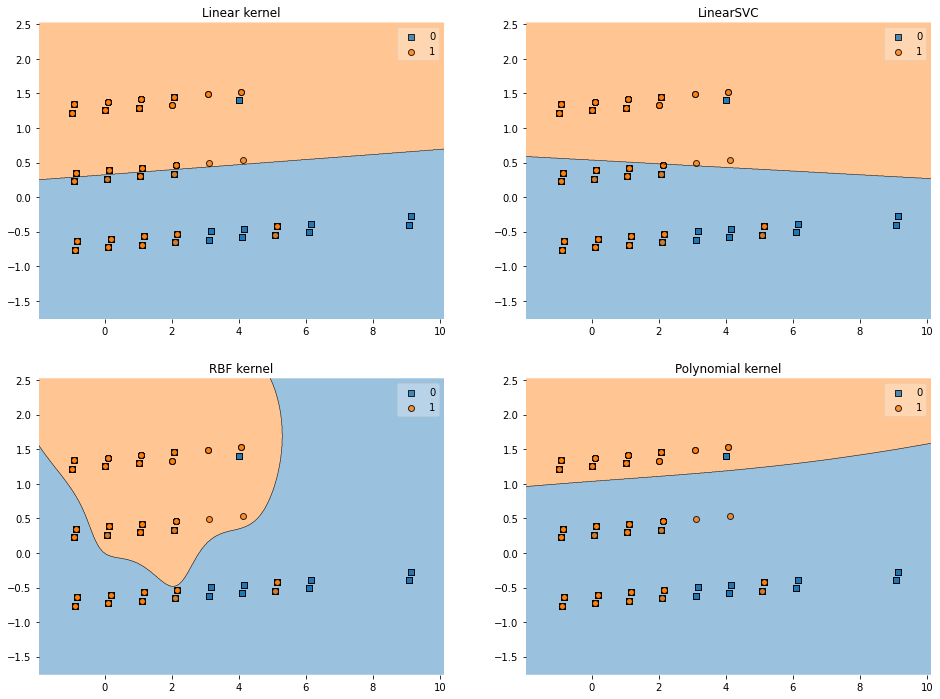

In [ ]:
from mlxtend.plotting import plot_decision_regions

def reduce_x_and_fit(svm_model, X, y):
    """
    Reduce the dimensionality of the input space to 2D and train an SVC model.

    Args:
        svm_model (sklearn.svm): a sklearn-based model    
        X (pd.DataFrame): input feature examples, size (n_examples, n_features)
        y (pd.Series): labels, size (n_examples,)
    Returns:
        swm_model (sklearn.svm): a trained sklearn-based model
        X_pca (pd.DataFrame): input feature examples, size (n_examples, 2)
        y_pca (np.ndarray): labels, size (n_examples,)        
    """    
    
    # Prepare target values
    y_pca = np.array(y)
    y_pca = y_pca.astype(np.integer)
    
    # We'll learn PCA later in this course
    X_pca = PCA(n_components = 2).fit_transform(X)
    svm_model.fit(X_pca, y_pca)
    
    return svm_model, X_pca, y_pca


# Plot decision boundary for all four models calculated above
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
models = [clone(model_linear), clone(model_linearSVC), clone(model_rbf), clone(model_poly)]
names = ['Linear kernel', 'LinearSVC', 'RBF kernel', 'Polynomial kernel']
for i in range(4):
    # Reduce the dimension of the input space to 2D
    svm_model, X_pca, y_pca = reduce_x_and_fit(models[i], X, y)
    
    # Set title
    ax[i // 2, i % 2].set_title(names[i])
                             
    # Plot decision boundaries
    plot_decision_regions(X_pca, y_pca, clf=svm_model, ax=ax[i // 2, i % 2], markers=['s', 'o'])    

<a name="2-3-2"></a>
#### 2.3.2. Plot 3D decision boundary

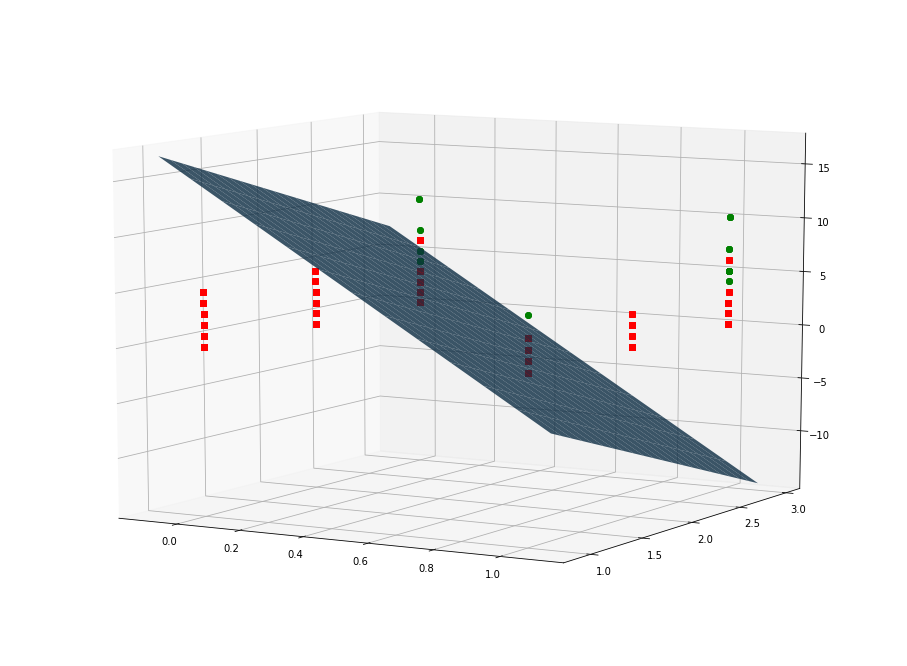

In [ ]:
# Fit the data with an svm
svc = model_linearSVC

h = 0.1  # step size in the mesh
x_min, x_max = X[selected_features[0]].min() - h, X[selected_features[0]].max() + h
y_min, y_max = X[selected_features[1]].min() - h, X[selected_features[1]].max() + h
dx, dy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should solve for the last coordinate
# to plot the plane in terms of x and y.
z = lambda x, y: (-svc.intercept_[0]-svc.coef_[0][0]*x-svc.coef_[0][1]*y) / svc.coef_[0][2]

# Plot 3D decision boundary
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 10, azim = -60)
ax.plot3D(X[selected_features[0]][y==0], X[selected_features[1]][y==0], X[selected_features[2]][y==0],'og')
ax.plot3D(X[selected_features[0]][y==1], X[selected_features[1]][y==1], X[selected_features[2]][y==1],'sr')
ax.plot_surface(dx, dy, z(dx, dy), alpha=.8)
plt.show()

<a name="2-4"></a>
### 2.4. Create a submission file for the Titanic Kaggle Challenge

In [ ]:
# Make a prediction
X_test = test[selected_features]
y_test_pred = svm_grid_model.predict(X_test)

# Create a submission file
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_test_pred})
submission.to_csv('submission.csv', index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


<a name="3"></a>
## 3. Exploring Iris Dataset

<a name="3-1"></a>
### 3.1. Comparison of different SVM classifiers

Let's compare different SVM classifiers on a 2D projection of the famous [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

At first, we only consider the first 2 features of this dataset:
+ Sepal length
+ Sepal width

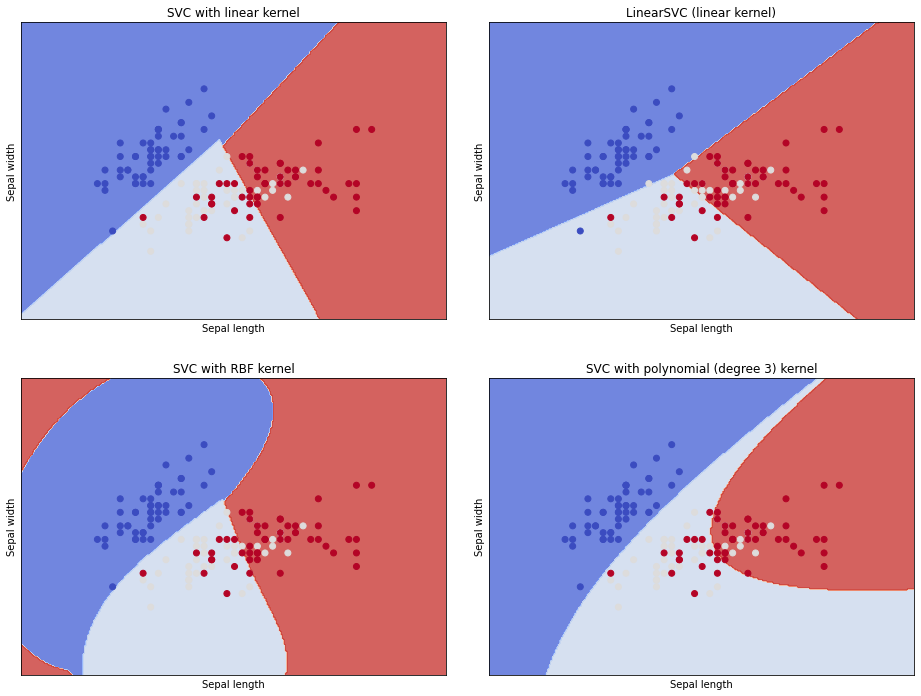

In [ ]:
# Plot different SVM classifiers for the iris dataset
from sklearn import datasets

# Import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# We create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', gamma='auto', C=C).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = SVC(kernel='poly', gamma='auto', degree=3, C=C).fit(X, y)
lin_svc = LinearSVC(C=C, max_iter=5000).fit(X, y)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

# Set the plots size
fig, ax = plt.subplots(figsize=(16,12))

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.1, hspace=0.2)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

<a name="3-2"></a>
### 3.2. Plotting 3D decision boundary

Let's add one more feature (petal length) and plot hyperplanes for the SVM model with a linear kernel.

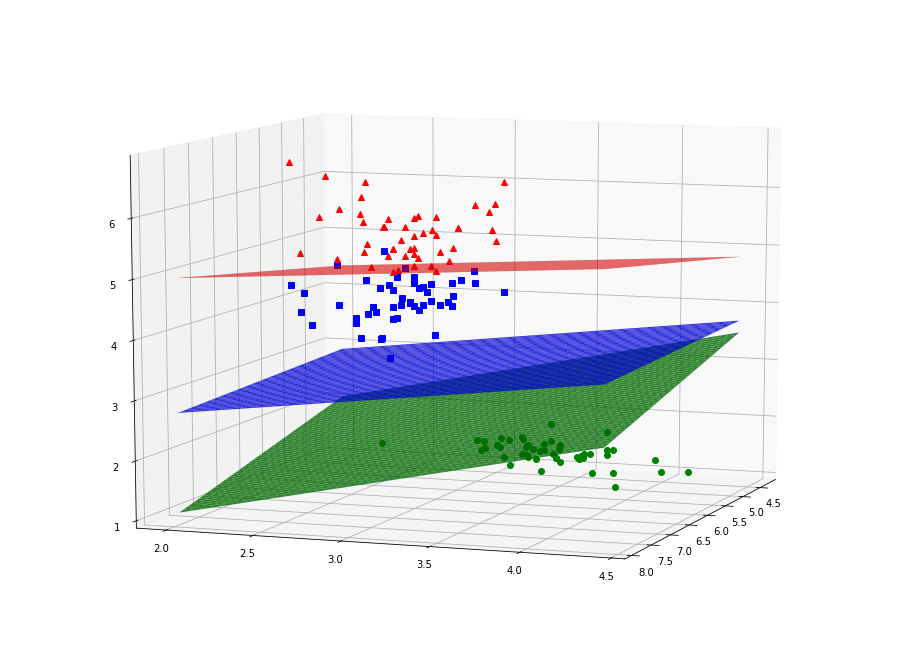

In [ ]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :3]
Y = iris.target

# Fit the data with an svm
svc = SVC(kernel='linear', C=1).fit(X, Y)

h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
x, y = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# The equation of the separating plane is given by all x in R^3 such that:
# np.dot(svc.coef_[0], x) + b = 0. We should solve for the last coordinate
# to plot the plane in terms of x and y.
z = lambda x,y,c: (-svc.intercept_[c]-svc.coef_[c][0]*x-svc.coef_[c][1]*y) / svc.coef_[c][2]

# Plot stuff
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev = 10, azim = 20)
ax.set_zlim(X[:, 2].min(), X[:, 2].max())
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2], 'og')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2], 'sb')
ax.plot3D(X[Y==2,0], X[Y==2,1], X[Y==2,2], '^r')
ax.plot_surface(x, y, z(x,y,0), color='g', alpha=.8)
ax.plot_surface(x, y, z(x,y,1), color='b', alpha=.8)
ax.plot_surface(x, y, z(x,y,2), color='r', alpha=.8)
plt.show()

<a name="4"></a>
## 4. Confusion matrix and its derivations

In the field of machine learning and specifically the problem of statistical classification, a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa, as in [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)).

We'll use [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) to analyze the errors of our SVM model with RBF kernel. By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$. Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$, and false positives is $C_{0,1}$:

![](03_cm.png)

#### Some useful derivations from a confusion matrix:

1. **Precision** (also called positive predictive value(PPV)) is the fraction of relevant instances among the retrieved instances:

$$Precision = \frac{TP}{TP + FP}$$

2. **Recall** (also known as sensitivity, hit rate, and true positive rate (TPR)) is the fraction of relevant instances that have been retrieved over the total amount of relevant instances:

$$Recall = \frac{TP}{TP + FN}$$

![](04_pr.png)
[\[image source\]](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/500px-Precisionrecall.svg.png)

3. **Accuracy** is the proportion of true results (both true positives and true negatives) among the total number of cases examined:

$$ACC = \frac{TP + TN}{TP + TN + FP + FN}$$

4. **F1 score** is the harmonic average of the precision and recall:

$$F_1 = \frac{2}{\frac{1}{Precision} + \frac{1}{Recall}} = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} = \frac{2TP}{2TP + FP + FN}$$



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

def display_cm(X, y, model, model_name):
    """
    Display a confusion matrix.

    Args:
        X (pd.DataFrame): input feature examples, size (n_examples, n_features)
        y (pd.Series): labels, size (n_examples,)
        model (sklearn.svm): a sklearn-based model
        model_name (string): a name of the model        
    """

    # Obtain predictions
    y_pred = model.predict(X)
    
    # Get a confusion matrix
    C = confusion_matrix(y, y_pred)
    PRF = precision_recall_fscore_support(y, y_pred, beta=1.0, average='binary')
    
    # Compute metrics
    precision = C[1,1] / (C[1,1] + C[0,1])
    recall = C[1,1] / (C[1,1] + C[1,0])
    acc = (C[1,1] + C[0,0]) / (C[1,1] + C[0,0] + C[0,1] + C[1,0])
    F1_score = 2 * precision * recall / (precision + recall)
    
    print(f"{model_name}:")
    print("Сonfusion matrix:\n", C)
    print()
    print("TP = ", C[1,1])
    print("FP = ", C[0,1])    
    print("TN = ", C[0,0])
    print("FN = ", C[1,0])    
    print()
    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("Accuracy: {:.3f}".format(acc))
    print("F1 score: {:.3f}".format(F1_score))
    print()
    print("Verification (using sklearn functions):")    
    print("Precision: {:.3f}".format(PRF[0]))
    print("Recall: {:.3f}".format(PRF[1]))
    print("Accuracy: {:.3f}".format(accuracy_score(y, y_pred)))    
    print("F1 score: {:.3f}".format(PRF[2]))
    print() 


models = [model_linear, model_linearSVC, model_rbf, model_poly]
names = ['Linear kernel', 'LinearSVC', 'RBF kernel', 'Polynomial kernel']

for i in range(4):
    print("----------------------------------------")    
    display_cm(X_train, y_train, models[i], names[i])

----------------------------------------
Linear kernel:
Сonfusion matrix:
 [[328  53]
 [ 80 162]]

TP =  162
FP =  53
TN =  328
FN =  80

Precision: 0.753
Recall: 0.669
Accuracy: 0.787
F1 score: 0.709

Verification (using sklearn functions):
Precision: 0.753
Recall: 0.669
Accuracy: 0.787
F1 score: 0.709

----------------------------------------
LinearSVC:
Сonfusion matrix:
 [[336  45]
 [ 82 160]]

TP =  160
FP =  45
TN =  336
FN =  82

Precision: 0.780
Recall: 0.661
Accuracy: 0.796
F1 score: 0.716

Verification (using sklearn functions):
Precision: 0.780
Recall: 0.661
Accuracy: 0.796
F1 score: 0.716

----------------------------------------
RBF kernel:
Сonfusion matrix:
 [[345  36]
 [ 83 159]]

TP =  159
FP =  36
TN =  345
FN =  83

Precision: 0.815
Recall: 0.657
Accuracy: 0.809
F1 score: 0.728

Verification (using sklearn functions):
Precision: 0.815
Recall: 0.657
Accuracy: 0.809
F1 score: 0.728

----------------------------------------
Polynomial kernel:
Сonfusion matrix:
 [[282  99]

<a name="5"></a>
## 5. YOUR TURN

1. Find some interesting not too big dataset (using sklearn.datasets, Kaggle, etc.).
2. Use logisitic regression model as a baseline.
3. Train and compare SVM models with different kernels.

In [ ]:
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [ ]:
ls 

71.csv  74.csv                       submission.csv
72.csv  diabetes.csv                 titanic_test_data.csv
73.csv  house_prices_train_data.csv  titanic_train_data.csv


In [ ]:
data = pd.read_csv('diabetes.csv')
data.sample(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
318,3,115,66,39,140,38.1,0.150,28,0
1386,4,197,70,39,744,36.7,2.329,31,0
163,2,100,64,23,0,29.7,0.368,21,0
1476,4,144,82,32,0,38.5,0.554,37,1


In [ ]:
data.shape

(2000, 9)

In [ ]:
data.isna().sum().any()

False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


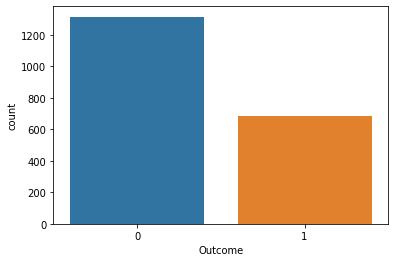

In [ ]:
sns.countplot(data.Outcome);

In [ ]:
data.corr()[['Outcome']]

,Outcome
Pregnancies,0.224437
Glucose,0.458421
BloodPressure,0.075958
SkinThickness,0.076040
Insulin,0.120924
BMI,0.276726
DiabetesPedigreeFunction,0.155459
Age,0.236509
Outcome,1.000000


In [ ]:
X = data.drop('Outcome', axis=1)
y = data.Outcome

In [ ]:
 X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True, random_state=0)

In [ ]:
numerical_transformer =  Pipeline(steps=[
    ('norm', StandardScaler()),
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_train.columns),
    ])

In [ ]:
def grid_params_model(model, preprocessor, params, X_train, y_train, X_dev, y_dev):
  clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])
  grid_search = GridSearchCV(clf, params, cv=5, scoring='f1')
  grid_search.fit(X_train, y_train)
  model_gs_best = grid_search.best_estimator_ 
  
  metrics_name = ['Mean cross-validated score', "accuracy_score train", "accuracy_score dev", "precision_score", "recall_score", "f1_score"]
  metrics_values = [grid_search.best_score_,
                    accuracy_score(y_train, model_gs_best.predict(X_train)),
                    accuracy_score(y_dev, model_gs_best.predict(X_dev)),
                    precision_score(y_dev, model_gs_best.predict(X_dev)),
                    recall_score(y_dev, model_gs_best.predict(X_dev)),
                    f1_score(y_dev, model_gs_best.predict(X_dev))]

  metrics_res = {k : v for k, v in zip(metrics_name, metrics_values)}
  
  return model_gs_best, metrics_res

In [ ]:
model = LogisticRegression(solver='liblinear')
params = {'model__C': np.linspace(0.1, 5, 20),
          'model__max_iter': [50, 100, 150, 200],
          'model__penalty': ('l1', 'l2')
         }
log_model, log_model_info = grid_params_model(model, preprocessor, params, X_train, y_train, X_dev, y_dev)
for k, v in log_model_info.items():
  print(k, v) 

Mean cross-validated score 0.631946932560719
accuracy_score train 0.7807142857142857
accuracy_score dev 0.7916666666666666
precision_score 0.7325581395348837
recall_score 0.6146341463414634
f1_score 0.6684350132625994


In [ ]:
model = SVC()
svm_m_params = {'model__C': [0.01, 0.1, 1],
          'model__gamma': [0.1, 1, 'auto'],
          'model__kernel': ['linear', 'poly', 'rbf'],
          'model__degree': [2, 3]}

In [ ]:
svm_model, svm_model_info = grid_params_model(model, preprocessor, svm_m_params, X_train, y_train, X_dev, y_dev)
for k, v in svm_model_info.items():
  print(k, v)

Mean cross-validated score 0.8082274351648492
accuracy_score train 0.9821428571428571
accuracy_score dev 0.9466666666666667
precision_score 0.9390862944162437
recall_score 0.9024390243902439
f1_score 0.9203980099502488


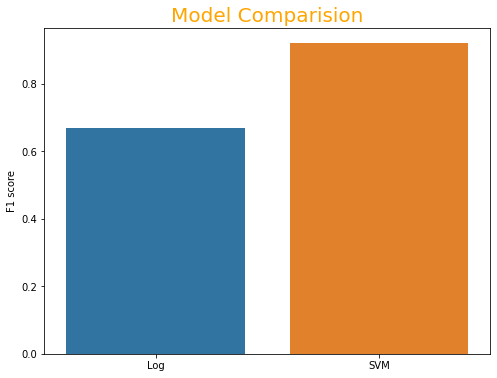

In [ ]:
indexx = ["Log", "SVM"]
scores = [ml.get('f1_score') for ml in [log_model_info, svm_model_info]]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx, y=scores)
plt.ylabel('F1 score')
plt.title('Model Comparision', color='orange', fontsize=20);

In [ ]:
svm_m_params = {'model__C': [0.01, 0.1, 1],
          'model__gamma': [0.1, 1, 'auto'],
          'model__kernel': ['linear'],
          'model__degree': [2, 3]}
svm_linear_model, svm_linear_model_info = grid_params_model(model, preprocessor, svm_m_params, X_train, y_train, X_dev, y_dev)

In [ ]:
svm_m_params = {'model__C': [0.01, 0.1, 1],
          'model__gamma': [0.1, 1, 'auto'],
          'model__kernel': ['poly'],
          'model__degree': [2, 3]}
svm_poly_model, svm_poly_model_info = grid_params_model(model, preprocessor, svm_m_params, X_train, y_train, X_dev, y_dev)

In [ ]:
svm_m_params = {'model__C': [0.01, 0.1, 1],
          'model__gamma': [0.1, 1, 'auto'],
          'model__kernel': ['rbf'],
          'model__degree': [2, 3]}
svm_rbf_model, svm_rbf_model_info = grid_params_model(model, preprocessor, svm_m_params, X_train, y_train, X_dev, y_dev)

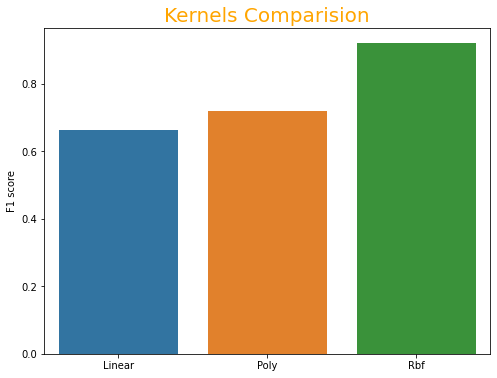

In [ ]:
indexx = ["Linear", "Poly", "Rbf"]
scores = [ml.get('f1_score') for ml in [svm_linear_model_info, svm_poly_model_info, svm_rbf_model_info]]

plt.figure(figsize=(8,6))
sns.barplot(x=indexx, y=scores)
plt.ylabel('F1 score')
plt.title('Kernels Comparision', color='orange', fontsize=20);

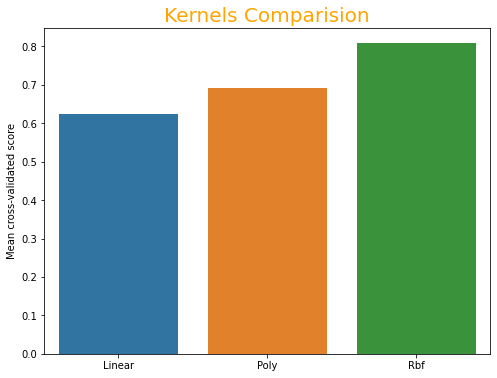

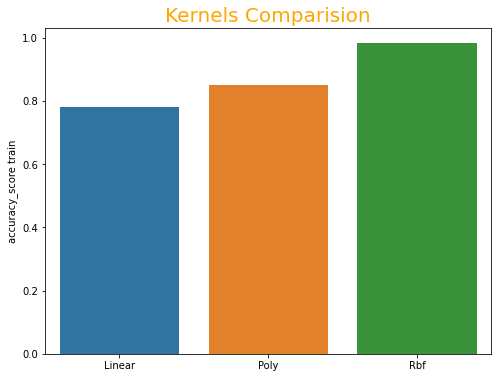

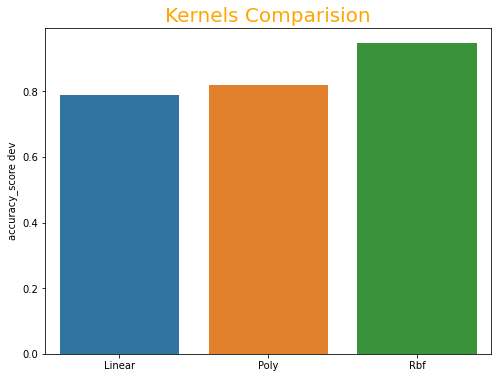

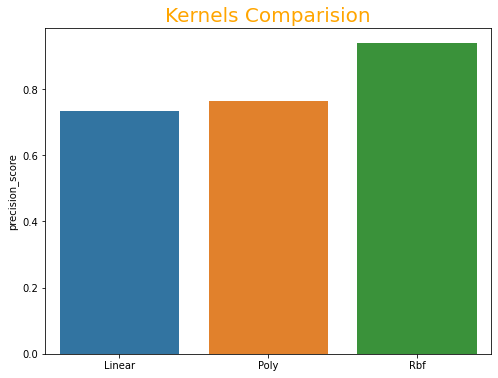

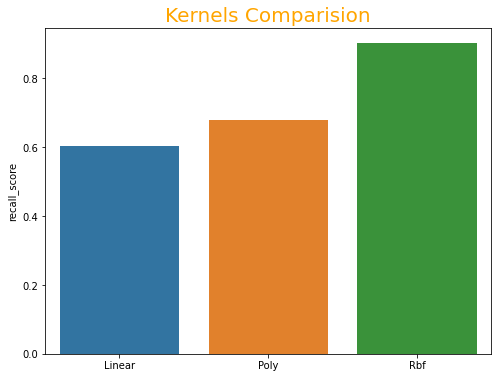

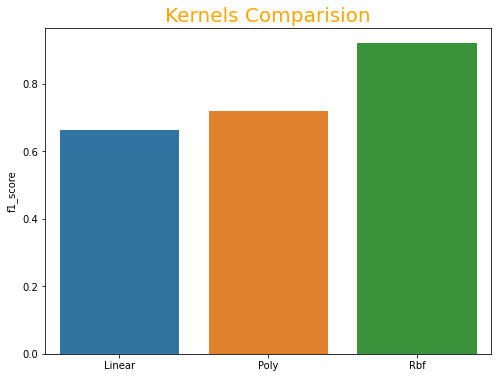

In [ ]:
indexx = ["Linear", "Poly", "Rbf"]
for metrics in svm_rbf_model_info.keys():

  scores = [ml.get(metrics) for ml in [svm_linear_model_info, svm_poly_model_info, svm_rbf_model_info]]

  plt.figure(figsize=(8,6))
  sns.barplot(x=indexx, y=scores)
  plt.ylabel(metrics)
  plt.title('Kernels Comparision', color='orange', fontsize=20);